In [2]:
import numpy as np
from scipy.stats.mstats import gmean
import autoreload
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/paul-levy/SF_diversity/master/Analysis/Functions/paul_plt_style.mplstyle');
import matplotlib.backends.backend_pdf as pltSave
%matplotlib inline

save_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/Analysis/Figures/'; # local
data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'; # local
expName = 'dataList.npy';

In [3]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.style'] = 'oblique'
rcParams['font.size'] = 15;
rcParams['pdf.fonttype'] = 3 # should be 42, but there are kerning issues
rcParams['ps.fonttype'] = 3 # should be 42, but there are kerning issues

In [13]:
data_loc

'/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'

In [14]:
import os

ah
ah
ah
ah


/Users/paulgerald/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:40: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/Users/paulgerald/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:41: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/Users/paulgerald/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:43: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/Users/paulgerald/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:44: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah
ah


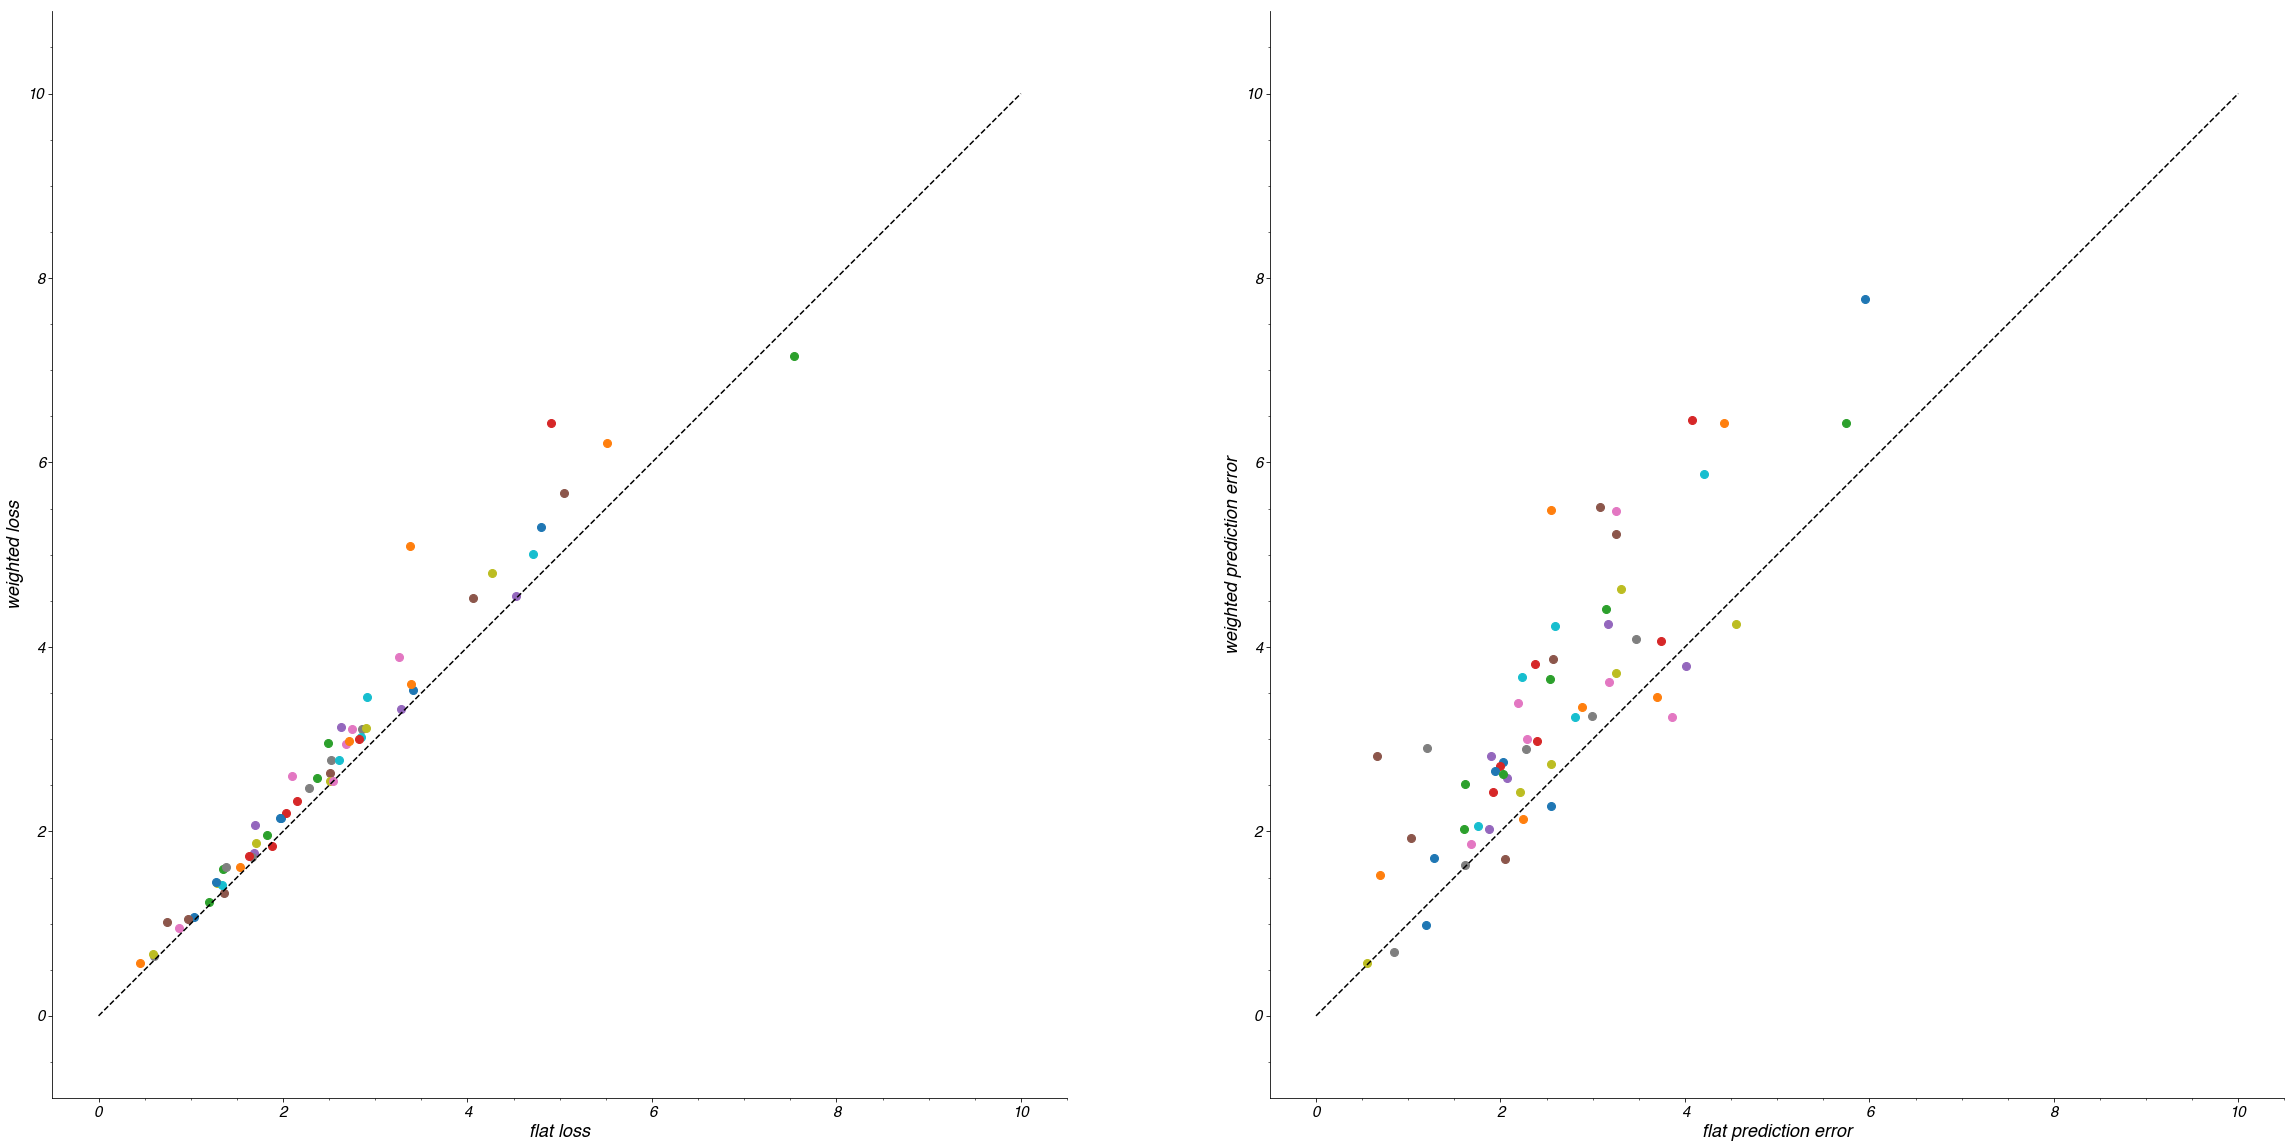

In [45]:
nCells = 59;
to_print = 0;

losses = [];
preds = [];

f, ax = plt.subplots(1, 2, figsize=(40, 20));

for i in range(nCells):

    flat   = np.load(data_loc + 'holdQuick_%d__flat_sqrt.npy' % (i+1), encoding='latin1').item();
    weight = np.load(data_loc + 'holdQuick_%d__wght_sqrt.npy' % (i+1), encoding='latin1').item();

    # 0 is for only single gratings! (i.e. dispersion 0)                                                                                                                                                    
    flat_loss = [np.mean(x) for x in flat['NLL'][0]];
    flat_pred = [np.mean(x) for x in flat['holdoutNLL'][0]];

    weight_loss = [np.mean(x) for x in weight['NLL'][0]];
    weight_pred = [np.mean(x) for x in weight['holdoutNLL'][0]];

    losses.append(np.subtract(flat_loss, weight_loss));
    preds.append(np.subtract(flat_pred, weight_pred));

    ax[0].plot(np.mean(flat_loss), np.mean(weight_loss), 'o')
    ax[1].plot(np.mean(flat_pred), np.mean(weight_pred), 'o')

#     print('plotting (%.2f, %.2f)' % ((np.mean(flat_pred), np.mean(weight_pred))))

    if to_print:
        print('Cell %d' % (i+1));
        print('\thigh contrast:');
        print('\t\tloss (f|w): %.3f, %.3f' % (flat_loss[0], weight_loss[0]));
        print('\t\tpred error (f|w): %.3f, %.3f' % (flat_pred[0], weight_pred[0]));
        print('\tlow contrast:');
        print('\t\tloss (f|w): %.3f, %.3f' % (flat_loss[1], weight_loss[1]));
        print('\t\tpred error (f|w): %.3f, %.3f' % (flat_pred[1], weight_pred[1]));
            
    # high contrast                                                                                                                                                                                             
    hc_loss = [x[0] if x!=[] else np.nan for x in losses];
    hc_pred = [x[0] if x!=[] else np.nan for x in preds];
    # low contrast                                                                                                                                                                                              
    lc_loss = [x[-1] if x!=[] else np.nan for x in losses];
    lc_pred = [x[-1] if x!=[] else np.nan for x in preds];

    
ax[0].plot([0, 10], [0, 10], 'k--')
ax[0].set_xlabel('flat loss', fontsize='large');
ax[0].set_ylabel('weighted loss', fontsize='large');
ax[0].axis('equal');

ax[1].plot([0, 10], [0, 10], 'k--')
ax[1].set_xlabel('flat prediction error', fontsize='large');
ax[1].set_ylabel('weighted prediction error', fontsize='large');
ax[1].axis('equal');